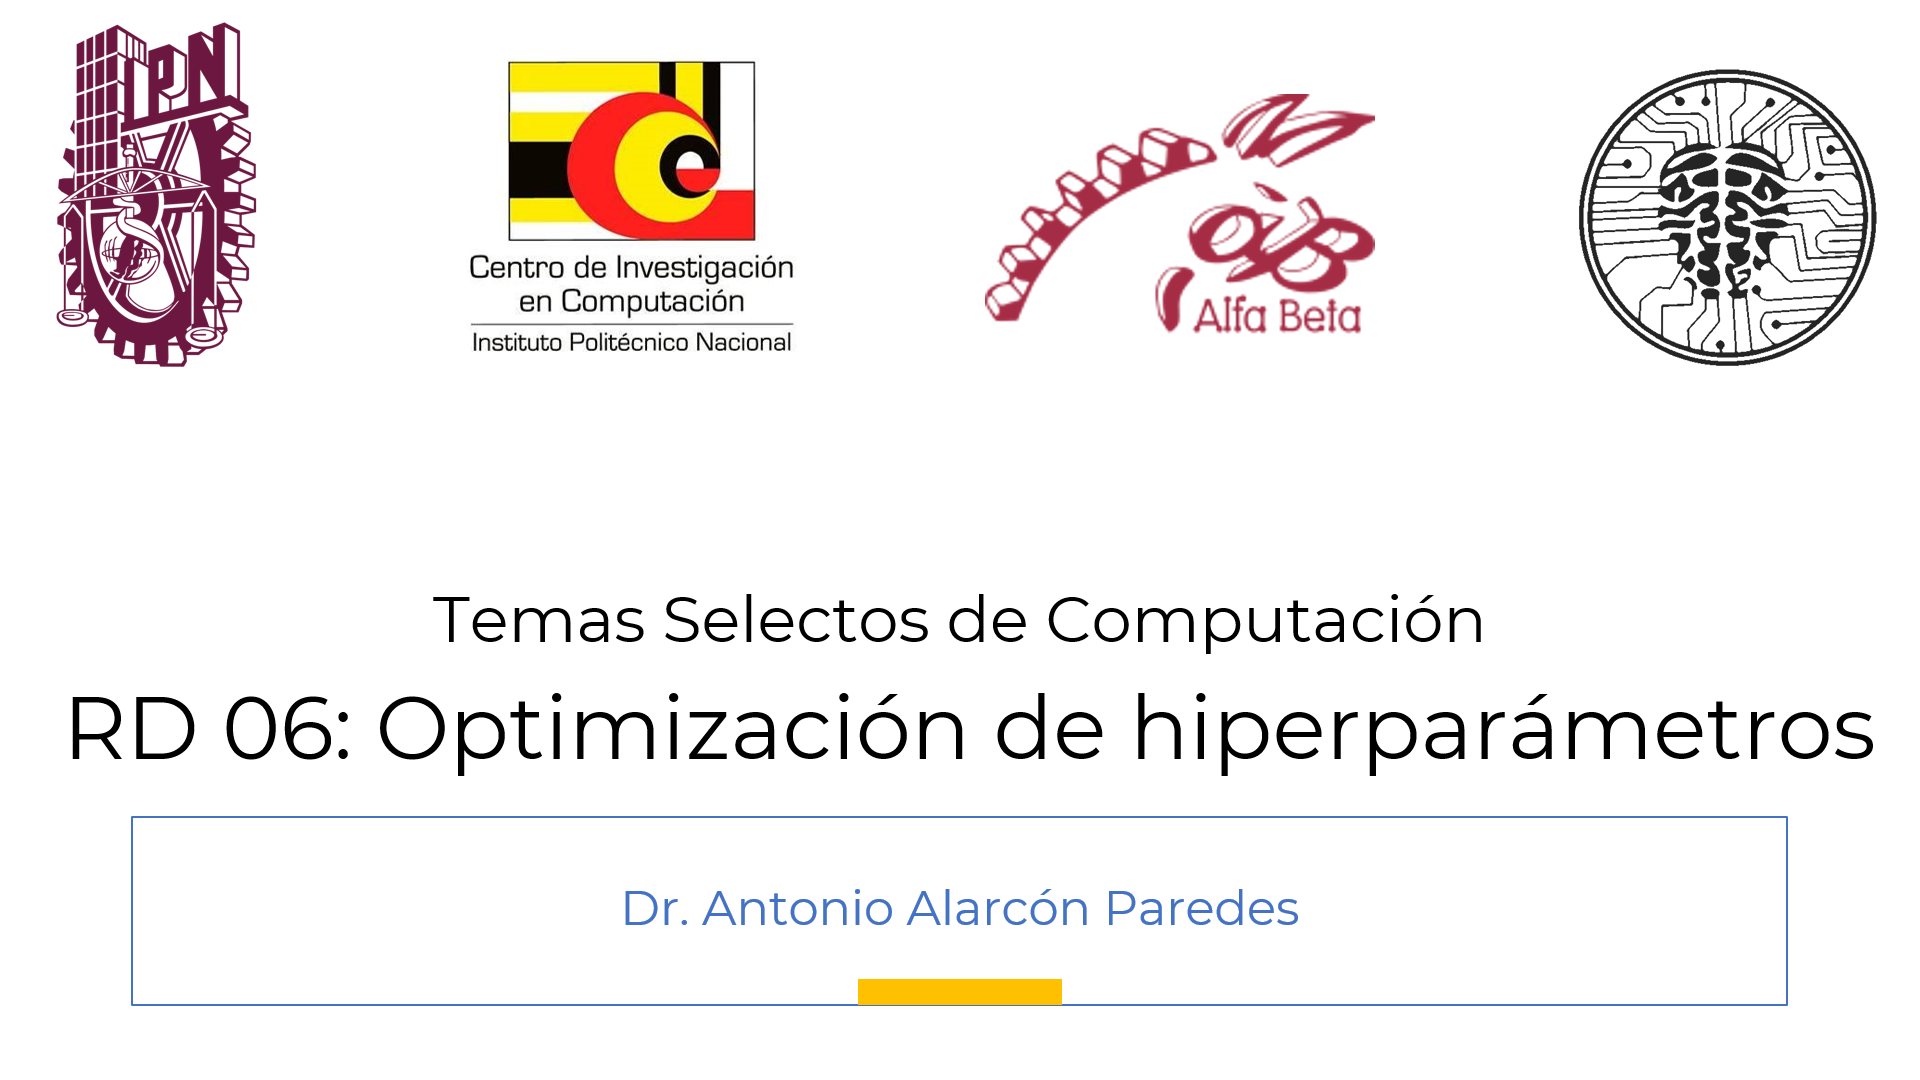

# Tema 5. Optimización de hiperparámetros
<br>

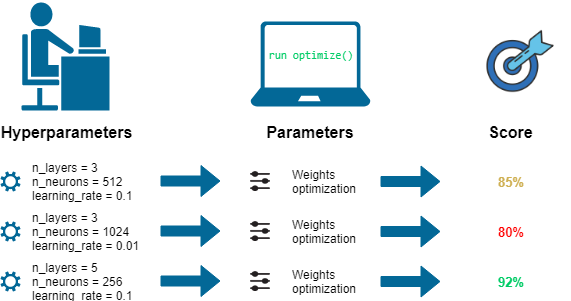

<br>

Los **hiperparámetros** son *parámetros* que NO se "aprenden" cuando un modelo es entrenado, sino que son argumentos que normalmente se le pasan al algoritmo para que realice su tarea de clasificación o regresión.

Por ejemplo, el tipo de kernel en las SVM, el número *k* de vecinos más cercanos en *k*-NN, o el número de árboles en un Random Forest.

Aunque es posible ir probando manualmente alguno de estos parámetros, hay otros para los que sería imposible probar uno a uno los posibles valores a tomar. Mas aún, existen algoritmos que pueden tener varios hiperparámetros, por lo que hacerlo manualmente no es opción.

Para esos casos, es posible automatizar el proceso de búsqueda de los mejores parámetros utilizando algunas funciones incluidas en Scikit-Learn.

Pero primero, ¿cuáles son los hiperparámetros que puede tener un algoritmo? Es posible obtenerlos con el método get_params().

Ejemplo:

In [7]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

mdl = SVC()
mdl = RandomForestClassifier()
mdl = KNeighborsClassifier()
mdl = GaussianNB()
mdl = MLPClassifier()


print(mdl.get_params())

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


## 5.1 GridSearch
El algoritmo GridSearch es un algoritmo que prueba de forma exhaustiva todas las combinaciones de los hiperparámetros que se le indique con el parámetro **param_grid**. 

Por ejemplo, el **param_grid** que se especifica aquí:

```
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
```

generará dos hipermallas: la **primera**, que probará el algoritmo de SVC con un kernel *linear* y valores del parámetro *C* iguales a *[1, 10, 100, 1000]*, mientras que la **segunda** probará las SVC con un kernel *RBF* con todas las combinaciones posibles usando *C* con valores iguales a *[1, 10, 100, 1000]* y valores gamma iguales a *[0.001 0.0001]*

Combinaciones de la primera malla:
<table>
  <tr>
    <th><font face="Courier New" size=5>Kernel</th>
    <th><font face="Courier New" size=5>C</th>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>linear</td>
    <td><font face="Courier New" size=4>1</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>linear</td>
    <td><font face="Courier New" size=4>10</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>linear</td>
    <td><font face="Courier New" size=4>100</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>linear</td>
    <td><font face="Courier New" size=4>1000</td>
  </tr>
</table>
</font>

Combinaciones de la segunda malla:
<table>
  <tr>
    <th><font face="Courier New" size=5>Kernel</th>
    <th><font face="Courier New" size=5>C</th>
    <th><font face="Courier New" size=5>Gamma</th>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>1</td>
    <td><font face="Courier New" size=4>0.001</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>1</td>
    <td><font face="Courier New" size=4>0.0001</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>10</td>
    <td><font face="Courier New" size=4>0.001</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>10</td>
    <td><font face="Courier New" size=4>0.0001</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>100</td>
    <td><font face="Courier New" size=4>0.001</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>100</td>
    <td><font face="Courier New" size=4>0.0001</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>1000</td>
    <td><font face="Courier New" size=4>0.001</td>
  </tr>
  <tr>
    <td><font face="Courier New" size=4>RBF</td>
    <td><font face="Courier New" size=4>1000</td>
    <td><font face="Courier New" size=4>0.0001</td>
  </tr>
</table>
</font>


In [1]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris() #Leer dataset de iris
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]} #Seleccionar parámetros a optimizar
svc = svm.SVC() #Crear objeto del clasificador

mdl = GridSearchCV(svc, parameters) #Crear gridsearch, se le pasa el clasificador y los parámetros
mdl.fit(iris.data, iris.target) #iris.data sería el X (los datos), iris.target sería y, el vector de clases

print('Best Score:\n',mdl.best_score_)
print('Best parameters:\n',mdl.best_params_,'\n')

print('Mean fit time:\n',mdl.cv_results_['mean_fit_time'])
print('Mean test score:\n',mdl.cv_results_['mean_test_score'])
print('Params:\n',mdl.cv_results_['params'])


print('\n\n')
print(sorted(mdl.cv_results_.keys()))

Best Score:
 0.9800000000000001
Best parameters:
 {'C': 1, 'kernel': 'linear'} 

Mean fit time:
 [0.00060425 0.00068231 0.00054884 0.00060143]
Mean test score:
 [0.98       0.96666667 0.97333333 0.98      ]
Params:
 [{'C': 1, 'kernel': 'linear'}, {'C': 1, 'kernel': 'rbf'}, {'C': 10, 'kernel': 'linear'}, {'C': 10, 'kernel': 'rbf'}]



['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_C', 'param_kernel', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']


In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
iris = datasets.load_wine()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000]}
scores = ['accuracy', 'recall_macro', 'f1_macro', 'balanced_accuracy']
svc = svm.SVC()


for score in scores:
  print('#################################################')
  print(f'Hyperparameter estimation for best {score}')
  mdl = GridSearchCV(svc, parameters, scoring=score)
  mdl.fit(iris.data, iris.target)

  print('Best Score:\n',mdl.best_score_)
  print('Best parameters:\n',mdl.best_params_,'\n')

  print('Mean fit time:\n',mdl.cv_results_['mean_fit_time'])
  print('Mean test score:\n',mdl.cv_results_['mean_test_score'])


  print('\n\n')
  sorted(mdl.cv_results_.keys())

#################################################
Hyperparameter estimation for best accuracy
Best Score:
 0.961111111111111
Best parameters:
 {'C': 1, 'kernel': 'linear'} 

Mean fit time:
 [0.08324704 0.0013556  0.18215508 0.00113702 0.18017149 0.00134959
 0.17936296 0.0021647 ]
Mean test score:
 [0.96111111 0.66349206 0.96111111 0.71952381 0.96111111 0.74206349
 0.96111111 0.89349206]



#################################################
Hyperparameter estimation for best recall_macro
Best Score:
 0.9658730158730158
Best parameters:
 {'C': 1, 'kernel': 'linear'} 

Mean fit time:
 [0.08027968 0.00130081 0.17917447 0.0011713  0.18440075 0.00130715
 0.17896805 0.0022234 ]
Mean test score:
 [0.96587302 0.62867725 0.96587302 0.71857143 0.96587302 0.73888889
 0.96587302 0.88883598]



#################################################
Hyperparameter estimation for best f1_macro
Best Score:
 0.9620733072617131
Best parameters:
 {'C': 10, 'kernel': 'linear'} 

Mean fit time:
 [0.08195219 0.001

In [ ]:
from sklearn import neighbors, datasets
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris()
parameters = {'n_neighbors':(3,5,7,9), 'weights':['uniform', 'distance']}
knn = neighbors.KNeighborsClassifier()

mdl = GridSearchCV(knn, parameters, scoring='balanced_accuracy')
mdl.fit(iris.data, iris.target)

print('Best Score:\n',mdl.best_score_)
print('Best parameters:\n',mdl.best_params_,'\n')

print('Mean fit time:\n',mdl.cv_results_['mean_fit_time'])
print('Mean test score:\n',mdl.cv_results_['mean_test_score'])


print('\n\n')
sorted(mdl.cv_results_.keys())

Best Score:
 0.9800000000000001
Best parameters:
 {'n_neighbors': 7, 'weights': 'uniform'} 

Mean fit time:
 [0.00053959 0.00050616 0.0005456  0.00049391 0.00047607 0.00045962
 0.00047336 0.00044332]
Mean test score:
 [0.96666667 0.96666667 0.97333333 0.96666667 0.98       0.98
 0.97333333 0.97333333]





['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_n_neighbors',
 'param_weights',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

## 5.2 RandomizedSearch
El algoritmo RandomizedSearch, como su nombre lo indica, prueba de forma aleatoria un número específico de combinaciones de los hiperparámetros que se le indique con el parámetro **param_grid**. A diferencia de GridSearch, aquí no se le dan los valores específicos, sino que se le indica un rango de valores dentro de una *función de distribución* de la cual tomará aleatoriamente ciertos valores para realizar la combinación de hiperparámetros.

Por ejemplo, el **distributions** que se especifica aquí:

```
distributions = [
  {'C': uniform(loc=0, scale=1000), 'gamma': uniform(loc=0.0001, scale=(0.001-0.0001)), 'kernel': ['rbf','linear']},

  mdl = RandomizedSearchCV(svc, distributions, n_iter=25)
 ]
```

generará *n_iter=25* combinaciones de parámetros para el algoritmo *SVC*, teniendo en cuenta que puede elegir aleatoriamente valores para un **kernel** *linear* o *rbf*, valores del parámetro **C** entre *0* y *1000*, y valores **gamma** aleatorios entre *0.001* y *0.0001*

La diferencia en la búsqueda de ambos algoritmos puede visualizarse como se muestra en la siguiente imagen:

<br>

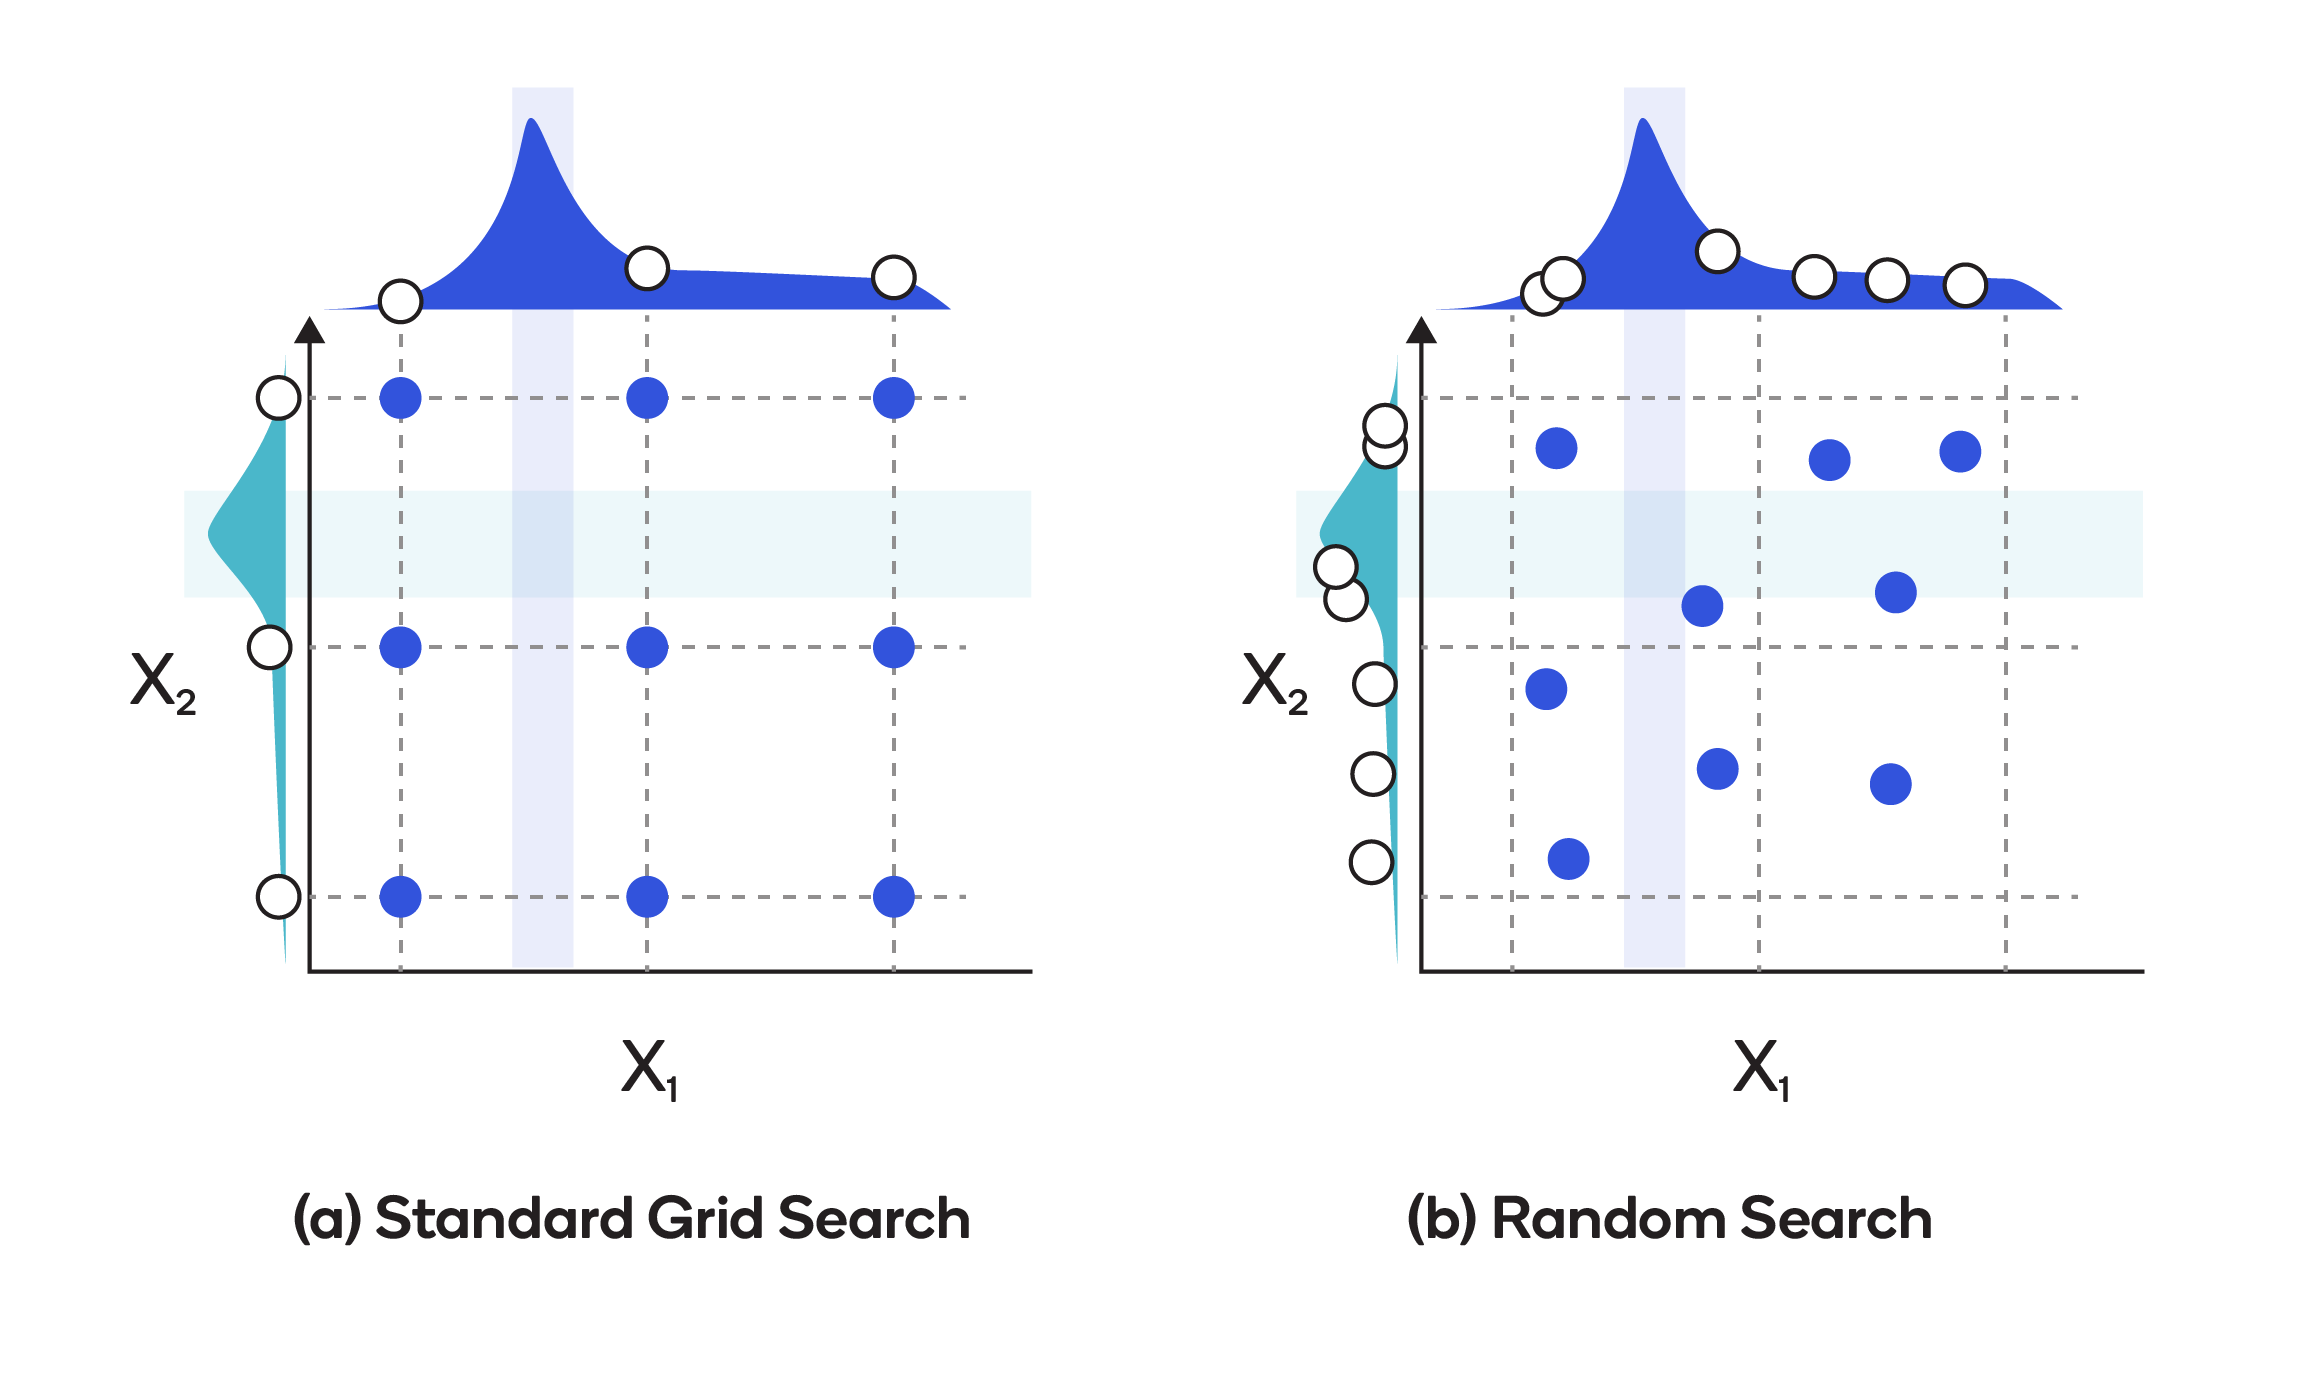

In [11]:
from sklearn import neighbors, datasets
from sklearn.model_selection import RandomizedSearchCV

iris = datasets.load_iris()
distributions = {'n_neighbors':(3,5,7,9), 'weights':['uniform', 'distance']}
knn = neighbors.KNeighborsClassifier()

mdl = RandomizedSearchCV(knn, distributions, scoring='f1_macro', n_jobs=-1, n_iter=8, random_state=10);
mdl.fit(iris.data, iris.target)

print('Best Score:\n',mdl.best_score_)
print('Best parameters:\n',mdl.best_params_,'\n')

print('Mean fit time:\n',mdl.cv_results_['mean_fit_time'])
print('Mean test score:\n',mdl.cv_results_['mean_test_score'])

print('\n\n')

print('----------------------------------------------')
print('Parameters:\n')
par=mdl.cv_results_['params']
for i,p in enumerate(par):
  print(i+1,p)
print('----------------------------------------------\n')


Best Score:
 0.9799498746867169
Best parameters:
 {'weights': 'uniform', 'n_neighbors': 7} 

Mean fit time:
 [0.00158644 0.00089216 0.00099554 0.00090475 0.0008903  0.0013082
 0.00096755 0.00095987]
Mean test score:
 [0.96648186 0.96648186 0.97316524 0.96617289 0.97994987 0.97994987
 0.97329992 0.97316524]



----------------------------------------------
Parameters:

1 {'weights': 'uniform', 'n_neighbors': 3}
2 {'weights': 'distance', 'n_neighbors': 3}
3 {'weights': 'uniform', 'n_neighbors': 5}
4 {'weights': 'distance', 'n_neighbors': 5}
5 {'weights': 'uniform', 'n_neighbors': 7}
6 {'weights': 'distance', 'n_neighbors': 7}
7 {'weights': 'uniform', 'n_neighbors': 9}
8 {'weights': 'distance', 'n_neighbors': 9}
----------------------------------------------



In [16]:
from sklearn import svm, datasets
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

iris = datasets.load_iris()
# distributions = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100, 1000], 'gamma':[0.1,1e-3,1e-6]}
distributions = {'kernel':('linear', 'rbf'), 'C':uniform(loc=0, scale=1000), 'gamma':uniform(loc=0, scale=0.1)}
scores = ['accuracy', 'recall_macro', 'f1_macro', 'balanced_accuracy']
svc = svm.SVC()


for score in scores:
  print('#################################################')
  print(f'Hyperparameter estimation for best {score}')
  mdl = RandomizedSearchCV(svc, distributions, n_jobs=-1, n_iter=300, scoring=score);
  mdl.fit(iris.data, iris.target)

  print('Best Score:\n',mdl.best_score_)
  print('Best parameters:\n',mdl.best_params_,'\n')

  print('Mean fit time:\n',mdl.cv_results_['mean_fit_time'])
  print('Mean test score:\n',mdl.cv_results_['mean_test_score'])


print('\n\n')
#sorted(mdl.cv_results_.keys())

print('----------------------------------------------')
print('Parameters:\n')
par=mdl.cv_results_['params']
for i,p in enumerate(par):
  print(i+1,p)
print('----------------------------------------------\n')

#################################################
Hyperparameter estimation for best accuracy
Best Score:
 0.9866666666666667
Best parameters:
 {'C': 61.75070155635331, 'gamma': 0.005572105834244745, 'kernel': 'rbf'} 

Mean fit time:
 [0.00097294 0.00251245 0.00101814 0.00090976 0.00094252 0.000912
 0.00162387 0.00163279 0.00112643 0.00090146 0.00198097 0.0019444
 0.00224781 0.00081005 0.00178723 0.00125113 0.00090141 0.00095582
 0.0009387  0.00572367 0.00100274 0.00115752 0.00096169 0.00110884
 0.00100117 0.00077929 0.00094566 0.00096769 0.00223489 0.00125322
 0.00095139 0.00232711 0.00226483 0.00086565 0.00106268 0.00162554
 0.00090461 0.00122161 0.00248556 0.0024518  0.00230975 0.00110588
 0.00190749 0.00200367 0.00086451 0.00113764 0.00295291 0.00099359
 0.00088873 0.00099607 0.00088606 0.00102415 0.00106359 0.00089607
 0.00090795 0.00097394 0.00102105 0.00227332 0.00300498 0.00098939
 0.00095143 0.00089755 0.00103989 0.0011682  0.00174508 0.00088401
 0.0018044  0.00218186 0.002445

Basado en:


*   https://scikit-learn.org/stable/modules/grid_search.html
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV
*   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV
*   https://www.kdnuggets.com/2020/02/practical-hyperparameter-optimization.html



